# Introduction
Hello my Name is Nurfaldi, I'm a data scientist and today I want to show you how to conduct Analysis on a customer retention problem and how to develop a Deep learning model to predict customer churn. Enjoy!

## Description

### Objective

Companies based on subscribtion model revenue stability are highly dependent on its customer retention. Retention is highly affected by how satisfactory the company services are, which we can evaluate by taking surveys or looking at the data of customer that unsubsrciribed from the company aslo called churn rate.

In this project I will try to use deep learning models to predict churn rate in customers of a fictional telecomunication company. The data is generated by IBM. We will analyze the data and we will look for pattern that corellated to churn rate.

We will also explore the relation between the features with Exploratory Data Analysis to see if there is any insight that we can take from our data.


### Problem Statement

The main problem that I wanted to answer is which customer that have the highest probability of churn rate. This will help our marketing and customer relation team to target highly propbable custumer and help them try to retain them with promotions.

Initally we will analyze the data with EDA and try to find pattern related to churn.  

After that we will build Deep learning models and we will analyze the perfomance of our model.

#### Data
Our Main dataset can be fetched here:

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# Import Libraries

In [1]:
# Import library

# Standard Python Libraries
import numpy as np
import pandas as pd
from scipy import stats

import datetime, os


# visualization library and settings
import matplotlib.pyplot as plt
import seaborn as sns


# Data Science Libraries
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

## Outlier handler
from feature_engine.outliers import Winsorizer

## imputer
from sklearn.impute import KNNImputer
from sklearn.impute import KNNImputer as sklearnKNNImputer

## Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

## Encoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder as sklearnOneHotEncoder
from sklearn.preprocessing import LabelEncoder

## Imbalance samplers
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC, SMOTE, ADASYN

## Pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

## Machine Learning models
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp
%load_ext tensorboard

### For AdaBoost

## Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Cross validation
from sklearn.model_selection import cross_val_score

## Evaluation Metrics
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import mglearn

# Model export
import pickle

In [2]:
#Setting random seed for consistency
np.random.seed(12)
tf.random.set_seed(12)

#Setting Plot style
sns.set_theme(style="whitegrid")

# Data Loading

In [3]:
# import data
df = pd.read_csv('../data/telco_customer_churn.csv')

# Calling dataframe head and tail
df_head_tail = pd.concat([df.head(3), df.tail(3)])
df_head_tail.T

,0,1,2,7040,7041,7042
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Female,Male,Male,Female,Male,Male
SeniorCitizen,0,0,0,0,1,0
Partner,Yes,No,No,Yes,Yes,No
Dependents,No,No,No,Yes,No,No
tenure,1,34,2,11,4,66
PhoneService,No,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,Yes


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [5]:
df.shape

(7043, 21)

The data is only 7043 rows, which is a litte bit small for a deep learning model. This can affect our model consistency accross mulitple runs because we can't run a very deep models before the model would be overfitted before it stabilize

In [6]:
# Duplicate data for backup
df_copy = df.copy()

Column Explaination

- customerID: Unique ID of each customer
- gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharge: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer

Source:
https://towardsdatascience.com/predict-customer-churn-with-r-9e62357d47b4

# Exploratory Data Analysis (EDA)

## Cleaning

In [7]:
# Listing all columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

The column names are straightforward, we can continue

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


It seems that the data type of total_charges column is wrong. Lets fix this 

In [9]:
# Creating fix dataframe
d2 = df[['TotalCharges'] + ['customerID']].copy()
df_new = d2['customerID']
exceptions_list = []

# changing data types
result = pd.to_numeric(d2['TotalCharges'], errors = 'coerce')
df_new = pd.concat([df_new, result], axis=1)

# creating list of failed conversion
exceptions_list = exceptions_list + d2.customerID[result.isnull()].tolist()
    
exceptions_list = list(set(exceptions_list))

In [10]:
# printing Failed conversion
df_exception = d2[d2['customerID'].isin(exceptions_list)][['TotalCharges'] + ['customerID']].copy()
df_exception

,TotalCharges,customerID
488,,4472-LVYGI
753,,3115-CZMZD
936,,5709-LVOEQ
1082,,4367-NUYAO
1340,,1371-DWPAZ
3331,,7644-OMVMY
3826,,3213-VVOLG
4380,,2520-SGTTA
5218,,2923-ARZLG
6670,,4075-WKNIU


We can see that wrongly converted values are empty, but there must be some character that hinder us from converting the data type, lets check those: 

In [11]:
# Checking failed conversion values 
df_exception.values.tolist()

[[' ', '4472-LVYGI'],
 [' ', '3115-CZMZD'],
 [' ', '5709-LVOEQ'],
 [' ', '4367-NUYAO'],
 [' ', '1371-DWPAZ'],
 [' ', '7644-OMVMY'],
 [' ', '3213-VVOLG'],
 [' ', '2520-SGTTA'],
 [' ', '2923-ARZLG'],
 [' ', '4075-WKNIU'],
 [' ', '2775-SEFEE']]

The character is a white space, we can assign this as missing values. since we already convert the data type with coerce parameter, these values are already converted into NaN that we could handle later. 

But Since we are here, lets explore this values and its patern

In [12]:
df[d2['customerID'].isin(exceptions_list)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


As we can see here, most of the missing values (9 entry) have a two years contract agreement with the company, with one entry that have a one year contract. most of them (8) also have a mailed check payement method, the rest use auto bank transfer (2) and automatic credit card (1).

For lets check the two years contract form the rest of the data, maybe we can find some pattern that will helps us fill the missing values

In [13]:
df[df.Contract == 'Two year']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
17,9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No
23,3638-WEABW,Female,0,Yes,No,58,Yes,Yes,DSL,No,...,No,Yes,No,No,Two year,Yes,Credit card (automatic),59.90,3505.1,No
28,5248-YGIJN,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,4807-IZYOZ,Female,0,No,No,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No
7019,9710-NJERN,Female,0,No,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826,No
7028,9281-CEDRU,Female,0,Yes,No,68,Yes,No,DSL,No,...,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),64.10,4326.25,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No


I can't find any pattern that stand out here, but we can see that all total charges are more than 10x the monthly charges from our sample. I presume that two years contract means that the person should pay at least 24x the monthly charges. let's check if this is true.

In [14]:
df[(df.Contract == 'Two year') & (df_new.TotalCharges < df.MonthlyCharges * 24)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
158,6371-NZYEG,Male,0,Yes,Yes,16,Yes,No,DSL,Yes,...,Yes,No,Yes,No,Two year,No,Mailed check,64.25,1024,No
159,7554-NEWDD,Male,0,No,No,10,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.70,251.6,No
172,6727-IOTLZ,Male,0,Yes,No,14,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,81.95,1181.75,No
236,0621-JFHOL,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Two year,Yes,Mailed check,29.60,299.05,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6829,8148-WOCMK,Male,0,Yes,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.60,125,No
6834,3635-JBPSG,Female,0,No,No,15,No,No phone service,DSL,No,...,No,No,No,Yes,Two year,Yes,Mailed check,38.80,603,No
6865,8792-AOROI,Female,0,Yes,No,8,Yes,No,DSL,Yes,...,No,Yes,No,Yes,Two year,No,Mailed check,65.50,564.35,No
6906,9945-PSVIP,Female,0,Yes,Yes,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,18.70,383.65,No


Hmm, so my assumption is not true, but still our condition results only 141 rows from 1695 people that have a two years contract. thats about 8% of the population. we can safely say that most of people that have two years contract would pay for more than 24 months bill. 

for more detailed picture lets plot the graph between monthly charges to total charges.

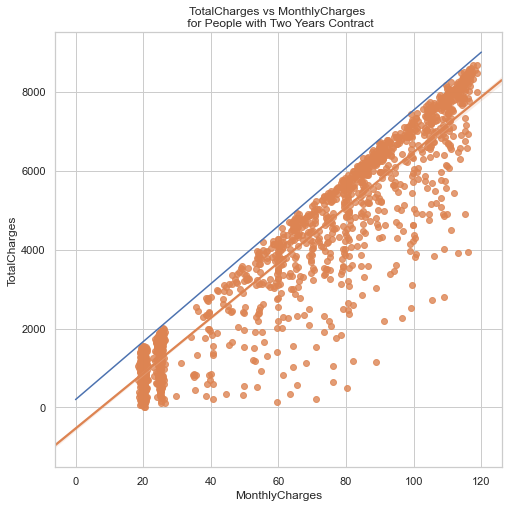

In [15]:
df_new['MonthlyCharges'] = df['MonthlyCharges']

x1, y1 = [0, 120], [200, 9000]


fig, ax = plt.subplots(figsize=(8, 8))

plt.plot(x1, y1)
p = sns.regplot(data=df_new[df.Contract == 'Two year'][['MonthlyCharges', 'TotalCharges']], 
                x='MonthlyCharges', y='TotalCharges', truncate=False).set(title='TotalCharges vs MonthlyCharges \n for People with Two Years Contract')

From this graph we can see that monthly charge (for two years contract) corellate strongly with total charge. The regression line of this graph shifted to the left seems to be a hard limit of total charge value. this means that with x as monthly charges and y as total charges, total charge would never surpass the y ≈ 75x + 200 equation.

We also have one total charges missing values for one year contract person. lets plot the same graph for this group.

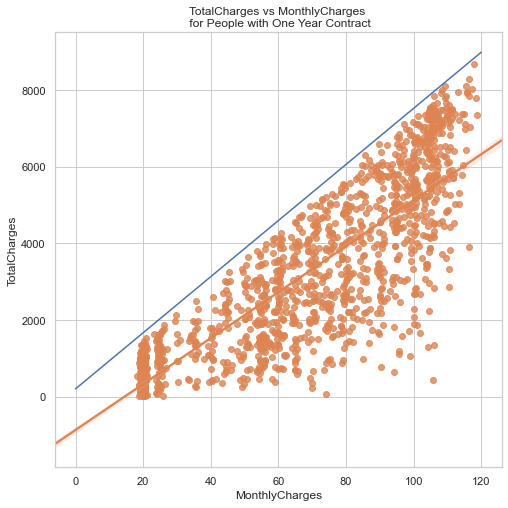

In [16]:
# x1, y1 = [0, 120], [200, 9000]
fig, ax = plt.subplots(figsize=(8, 8))

plt.plot(x1, y1)
p = sns.regplot(data=df_new[df.Contract == 'One year'][['MonthlyCharges', 'TotalCharges']], 
                x='MonthlyCharges', y='TotalCharges', truncate=False).set(title='TotalCharges vs MonthlyCharges \n for People with One Year Contract')

From the graph we can see that our hard line  y ≈ 75x + 200 equation is still true for people with one year contract. but the regression line seems to be a little bit more tilted clockwise and shifted to the right. this means the average total charges value for this group is lower than our first group. We can still see the high corellation between the two column.

We can use this insight to apply the regression equation for all missing values grouped by length of contract later. For now lets update our dataframe

In [17]:
# apply value change
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

So after this exploration, I'm still curious about this values, so after looking out at where the missing values are, i found that the tenure in all of them are 0. is their charge 0 because their tenure is 0? lets check this out by filtering our dataset to tenure == 0

In [18]:
df[(df.tenure == 0)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Wow we can see that all of our data that have 0 tenure infact are our rows that contain missing values. So It looks like that our assumption is correct that the Nan values in charges is caused by 0 tenure (or 0 subscription time). So what exactly is the relation between tenure, total charges and monthly charges? lets find out

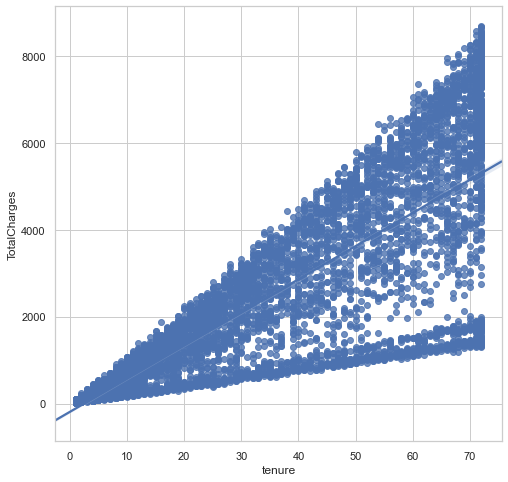

In [19]:
df_new['tenure'] = df['tenure']

fig, ax = plt.subplots(figsize=(8, 8))

p = sns.regplot(data=df_new[['tenure', 'TotalCharges']], 
                x='tenure', y='TotalCharges', truncate=False)

Interesting, tenure shows a very strong positive corellation to total charges. and we can see that the scatter shaped like a cone with hard limit on the top and the bottom of the chart.

What I just relize, from the name it looks like that Total charge should be tenure * monthly charge, lets check the plot of this one

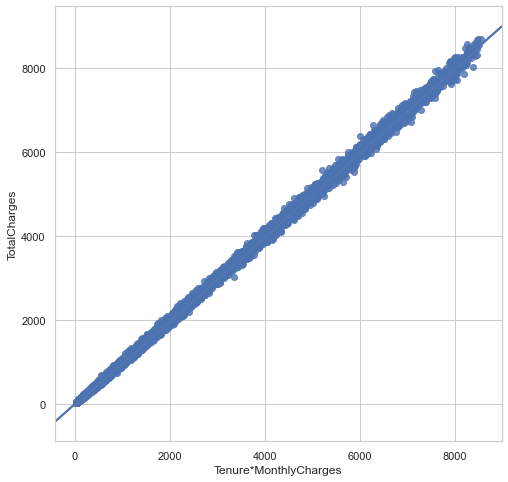

In [20]:
df_new['Tenure*MonthlyCharges'] = df_new['MonthlyCharges'] *  df_new['tenure']

fig, ax = plt.subplots(figsize=(8, 8))
p = sns.regplot(data=df_new[['Tenure*MonthlyCharges', 'TotalCharges']], 
                x='Tenure*MonthlyCharges', y='TotalCharges', truncate=False)

Wow this graph shows that Total charge are infact 'Tenure x Monthly charge' . This can be a nice point to stop our exploration about these values. From this graph we can conclude that if we're going to do regression model to our data, we can use either the two feature (tenure and monthly charge) or Total charge.

We can also safetly impute our Nan values as 0

In [21]:
# filling nan with 0
df.fillna(0)

# checking df info for data type and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can confirm here that the data types is already appropriately assigned. we also already fill all of our missing values with 0 based on our analysis above. so lets continue!

Let's check for duplicates

In [22]:
# Checking for duplicated rows
df.duplicated().sum()

0

There is no duplicate in our data, now lets check for missing values

In [23]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There is no missing values

It looks like that our data is ready for more explorations!

## Data Types Exploration

First let's review what each column means

- customerID: Unique ID of each customer
- gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharge: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer

We will start by checking every data features for pattern. fist we want to see potential categorical features. We can start by looking at unique values for each column and look for low count unique values. 

In [24]:
# Checking Unique Values of every columns
df.nunique().sort_values()

Churn                  2
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PaperlessBilling       2
PhoneService           2
Contract               3
StreamingMovies        3
StreamingTV            3
TechSupport            3
OnlineBackup           3
OnlineSecurity         3
InternetService        3
MultipleLines          3
DeviceProtection       3
PaymentMethod          4
tenure                73
MonthlyCharges      1585
TotalCharges        6530
customerID          7043
dtype: int64

From the number of unique values and the desciption we can see that all the data are in categorical format except for 'TotalCharges', 'MonthlyCharges', and 'tenure'. Now I let's see unique values in our dataset.

In [25]:
# Identifying unique values
unique_val = {}
unique_val_list =[]

for i in df.columns:
    if len(df[i].unique()) <= 10:
        unique_val[i] = df[i].unique()
        unique_val_list.append(i)
        
for key in unique_val:
    print(key, ' : ', unique_val[key])

gender  :  ['Female' 'Male']
SeniorCitizen  :  [0 1]
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No phone service' 'No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes' 'No internet service']
OnlineBackup  :  ['Yes' 'No' 'No internet service']
DeviceProtection  :  ['No' 'Yes' 'No internet service']
TechSupport  :  ['No' 'Yes' 'No internet service']
StreamingTV  :  ['No' 'Yes' 'No internet service']
StreamingMovies  :  ['No' 'Yes' 'No internet service']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  ['No' 'Yes']


We can see that all low unique values column are categorical and most are ordinal in nature. Most of the columns describe whether the customer is using a service or not. The third option of 'No Internet Service' is an additional information that shows if the customer is not subscribed to internet service thus naturally cannot subscribe to the service in each column.

let's assign the columns into column list with appropriate group

In [26]:
# Spliting numerical and categorical columns
col_id = ['customerID']
col_num = ['TotalCharges','MonthlyCharges','tenure']
col_cat = [col for col in df.columns if col not in col_num + col_id]

We can assign 'gender', 'Partner', 'Dependents', and 'PaymentMethod' as nominal. I choose to assign Senior Citizen as Ordinal because it is an extension of age which is a numerical data type. I also choose to assign internet service as an ordinal column type because either 'DSL' and 'Fiber Optic' value is better than 'No' and usually 'Fiber Optic' is a superior service in terms of speed, stability and latency compared to 'DSL service type.

In [27]:
# Categorical ordinal and categorical nominal columns list

col_cat_nominal = ['gender', 'Partner', 'Dependents', 'PaymentMethod']
col_cat_ordinal = [col for col in col_cat if col not in col_num]

## General Analysis

Since we want to focus on growth, lets dive into the variable

Churn
No     5174
Yes    1869
Name: customerID, dtype: int64
Churn rate : 0.36122922303826827


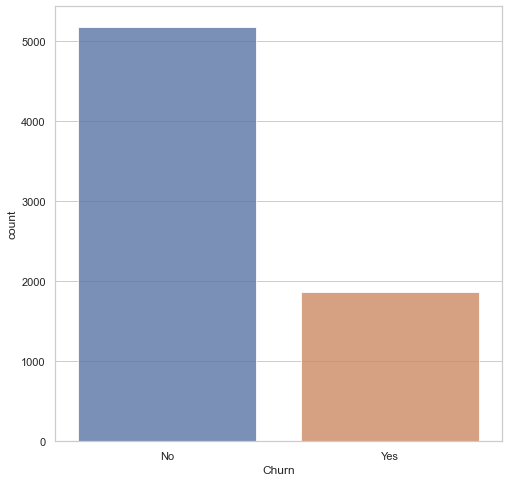

In [28]:
# Churn count plot
fig, ax = plt.subplots(figsize=(8, 8))
sns.countplot(data=df,x='Churn', alpha=.8)
target_count = df.groupby(['Churn'])['customerID'].count()
print(target_count)
print('Churn rate :', target_count[1]/target_count[0])

As we can see here the churn rate from all of customer is 0.36 that means 36% of all customer in the data that we get is left the service. Its not clear what is the timeframe of the data is though, Usually churn rate is calculated in monthly basis. if this happens in montly basis than the company would be in a very unhealthy situation

On data imbalance, from the total frequency of about 7000 data points, frequency of 36% in one category (1869 data points) shows that the data is quite imbalanced even if its not very significant. we can try to improve this by resampling our data later.

Next we will try to see any pattern in every features values by comparing the percentage of values in each churn class.

### Numerical Data Analysis

First lets apply function for our plots

In [29]:
dfa = df.copy()

def plot_median(col, target):
    dfa = df.groupby([target]).median().reset_index()

    fig, ax = plt.subplots(figsize=(8, 8))
    sns.barplot(data=dfa ,x=target, y=col, alpha=.6, ci="sd", palette="dark");

# distribution plot
def distribution_plot(col, target, outlier_filter=0):
    
    df_dis = dfa[(dfa[col] >= dfa[col].quantile(q=outlier_filter)) &
                        (dfa[col] <= dfa[col].quantile(q=1-outlier_filter))]
    
    plt.figure(figsize=(8, 6))
    ax = sns.violinplot(x=target, y=col, data=df_dis, dodge=False,
                        alpha=.6, scale="width", inner=None)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    for violin in ax.collections:
        bbox = violin.get_paths()[0].get_extents()
        x0, y0, width, height = bbox.bounds
        violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=ax.transData))

    sns.boxplot(x=target, y=col, data=df_dis, saturation=1, showfliers=False,
                width=0.3, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=ax
               
               )
    old_len_collections = len(ax.collections)
    sns.stripplot(x=target, y=col, data=df_dis, dodge=False, ax=ax
                 
                 )
    for dots in ax.collections[old_len_collections:]:
        dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.show();

### Tenure

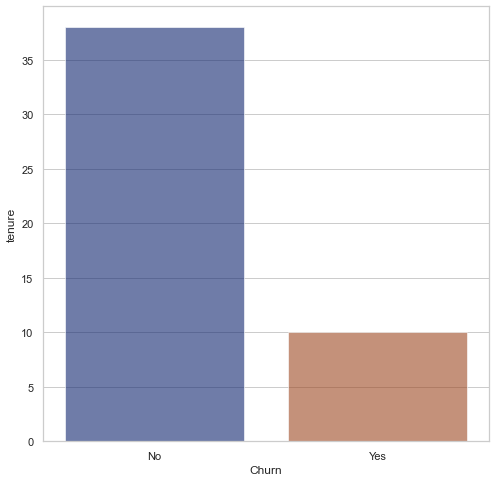

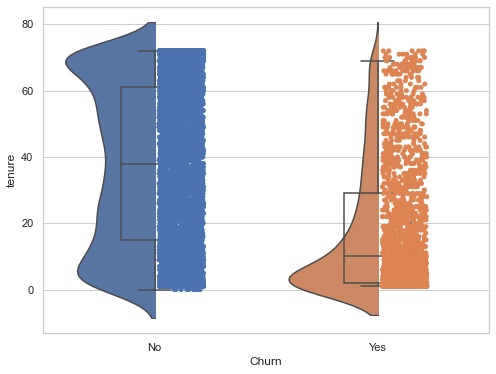

In [30]:
target = 'Churn'
col = 'tenure'
plot_median(col, target)
distribution_plot(col, target)

As we can see here median tenure is significantly higher in No/retained group. In fact it is almost 4 times higher at more than 35 months compared to 10 months of the people that quit the subscribtion. This shows that many of our churned customer is a new customer that quit after about one year. If majority of them are in one year contract, we can say that they are not satisfied or feel that our service is not necessary after their first contract expire, so they choose to not renew their subscribtion. This is naturally happened to every subsribtion based service and to improve this we would need to find what makes them leave by gathering more information.

We can also see that the distribution of tenure in each tenure value is diffrent. We have a quite equally distrubted retained customer across tenure length. We also can see that we can split our retained customer into two groups by looking at the peak of distributuin graph, new and old(loyal) customer.

Looking at the graph It seems that we're doing a good job retaining loyal customer because many of them stay after more then 60 month of using our service. 

On the other hand by comparing the two distribution plot, we can also say that we have got a same peak of new customer tenure time and if we pass a threshold around 15-18 months our customer is less likely to churn. 

### Monthly Charges

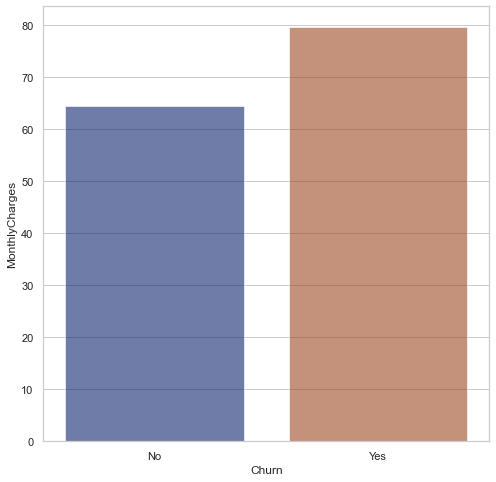

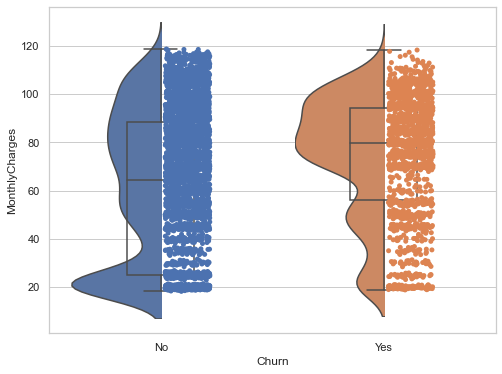

In [31]:
target = 'Churn'
col = 'MonthlyCharges'
plot_median(col, target)
distribution_plot(col, target)

What we can see here is Monthly charge highly affect customer retention. From the distribution, we can see that Customers with higher monthly fee are more likely to be churned than customer with low monthly charge.

### Total Charges

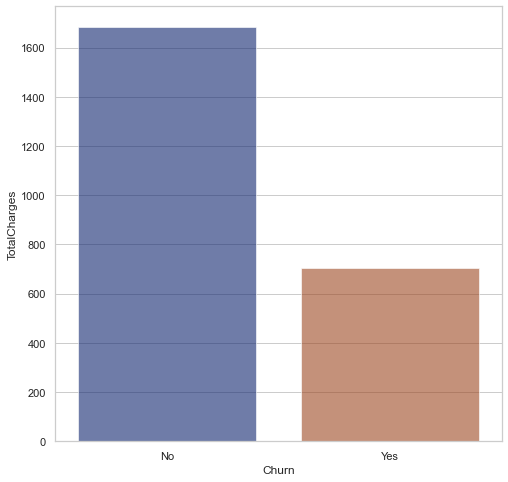

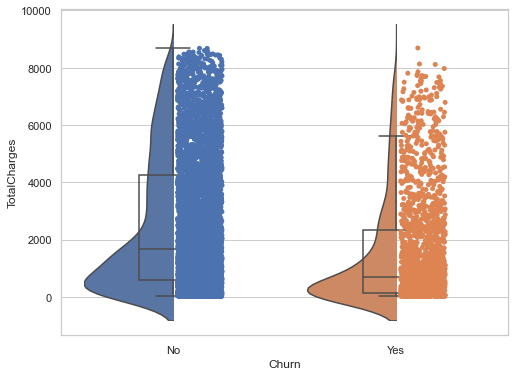

In [32]:
target = 'Churn'
col = 'TotalCharges'
plot_median(col, target)
distribution_plot(col, target)

As we established before total churn is a metrics that is a result of Monthly charge times tenure. Higher total charge in the barplot is makes sense because long and loyal customers pay more bill in because they subsribed for a long time.

What is interesting is the distribution of both class is similar at small number, but total charge distribution has a thicker tail that shows all the long time customers.

Next We will analyze categorical data and how the category of each feature compares *Percentage Wise* across churn rate. 

### Categorical Data Analysis

In [33]:
def cat_analysis(col, target):
    # Percentage dataframe
    df_plot = df.groupby([target, col]).count().reset_index()


    df_plot = df_plot[[target, col, 'customerID']]

    df_plot['percent'] = np.where(df_plot[target] == df_plot.iloc[0,0], 
                                  df_plot['customerID']/target_count[0], 
                                  df_plot['customerID']/target_count[1])

    # Ploting grouped barchart
    g = sns.catplot(
        data=df_plot, kind="bar",
        x=col, y="percent", hue=target,
        ci="sd", palette="dark", alpha=.6, height=6, aspect=(len(df_plot)*(3/2))/6,

    )
    g.despine(left=True)
    g.set_axis_labels(col, ('percentage in '+target))
    g.legend.set_title(target);

First lets see graphs for categories that are not really related to churn

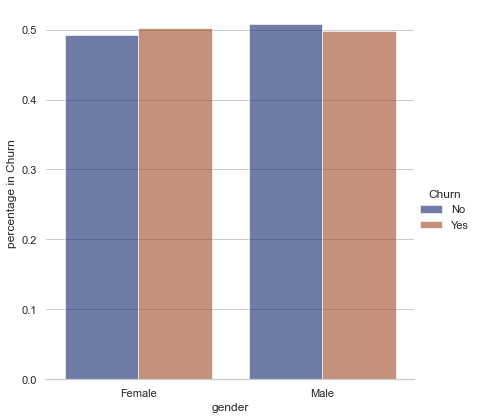

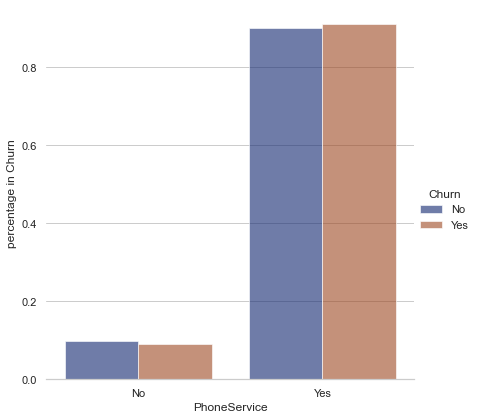

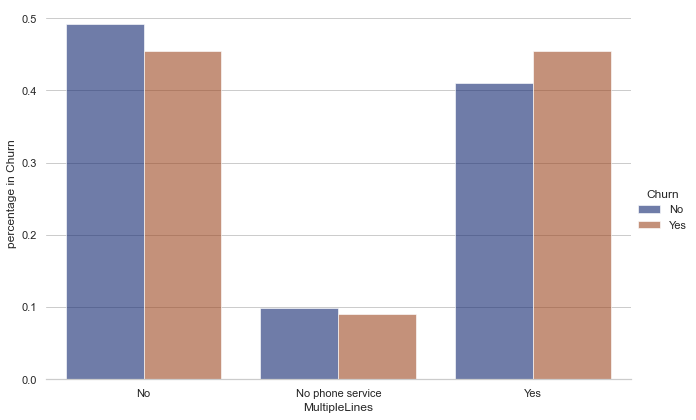

In [34]:
for i in ['gender', 'PhoneService', 'MultipleLines']:
    cat_analysis(i, 'Churn')

Here we can see that gender, phone services types and multiple lines, does not shows strong differences across churn types. 

Multiple lines shows a slight pattern that the frequency of people that use multiple lines is higher in churn category. but the diffrence is small

lets see for other categories. 

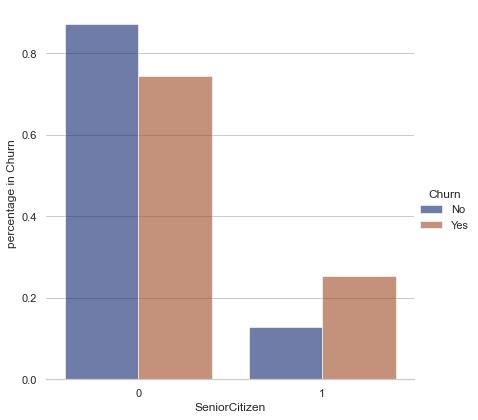

In [35]:
cat_analysis('SeniorCitizen', 'Churn')

We can see that there are more percentage of senior citizen in churn group compared to in retain group. or we can say that in a churn group, senior citizen frequency is higher than in a retain group. 

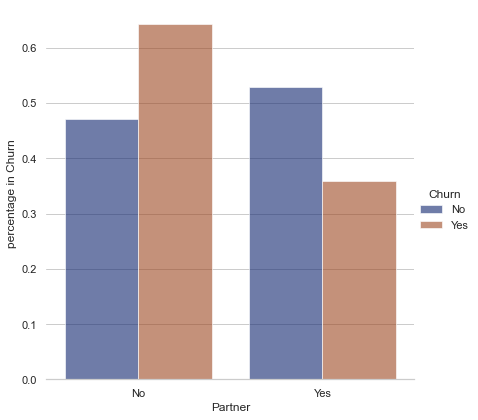

In [36]:
cat_analysis('Partner', 'Churn')

We can see that there are more percentage of single people in churn group compared to in retain group. or we can say that
in a churn group, single people frequency is higher than in a non churn group.

This is interesting because customer who churn seems to be older in our previous analysis (higher senior citizen frequency) but they are less likely to be married. Usually older people are more likely to be married. Sadly we don't have age data so we cannot explore further here.

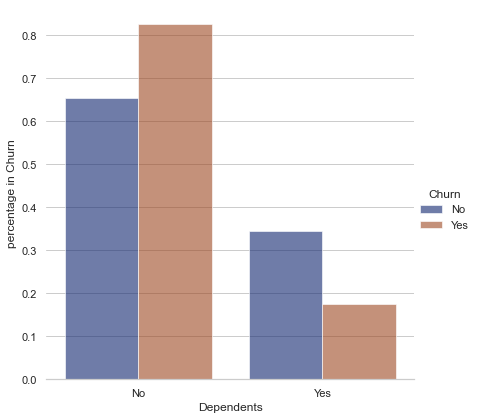

In [37]:
cat_analysis('Dependents', 'Churn')

This graph is is similar to partner graph but with lower people that have dependents, this is makes sense because married people are more likely to have dependence than single people.

Next we will see tha services that customers use.

In [38]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

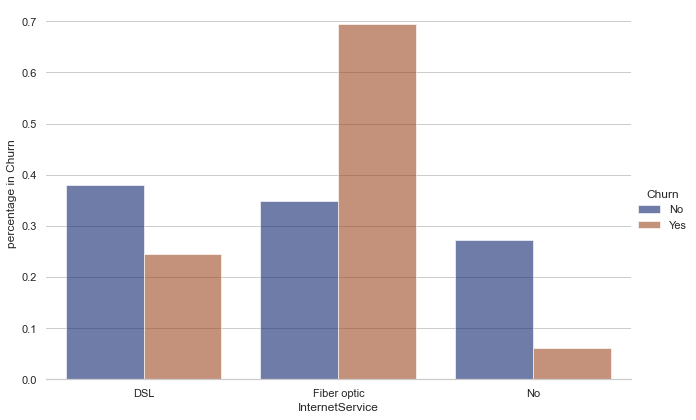

In [39]:
cat_analysis('InternetService', 'Churn')

We can see here that in churn grup the freqencey of fiber optic users are significatly higher than the other groups, this can indicates that we should investigate if there is something we can improve in fiber our fiber optic service.

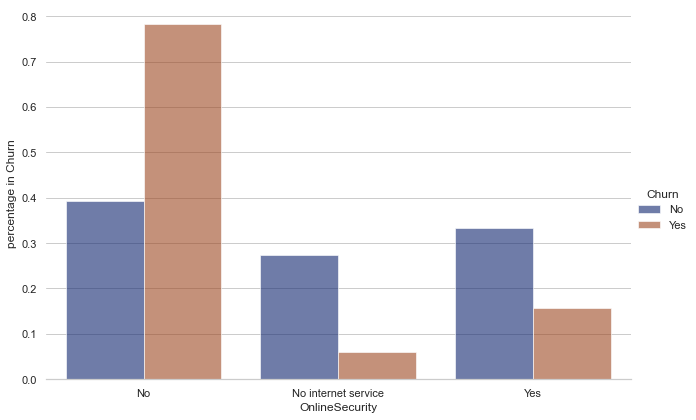

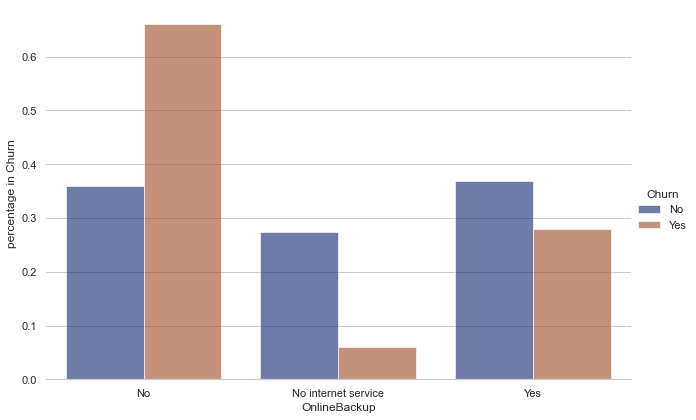

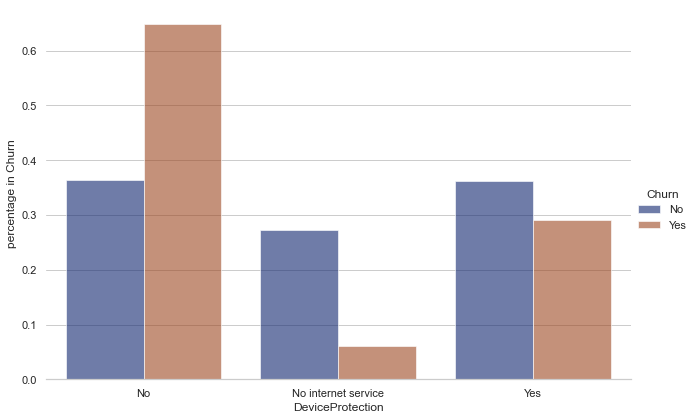

In [40]:
for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection']:
    cat_analysis(col, 'Churn')

The 'OnlineSecurity', 'OnlineBackup', and 'DeviceProtection' which I will call utilities, have a similar patern accross features, the frequency of people who have internet services but not using utilities services are significantly higher in churn group than in retain group. If people use the utilities the churn frequency improves and if people doesn't use internet at all, the churn rate is very low.

We can say that these utilities services have a good impact on our ability to retain our customer. We can use this as a promotion strategy by giving these services as a free trial to the customers and see if their experince improve and whether or not they want to continue thier subscription.

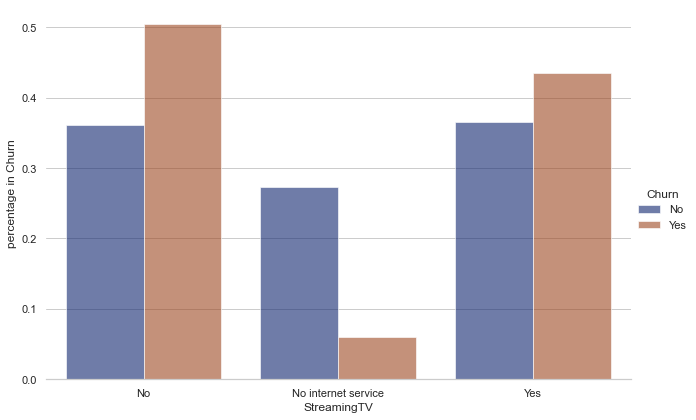

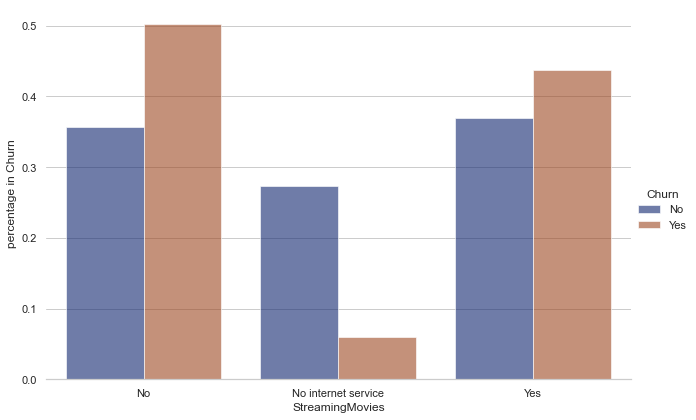

In [41]:
for col in ['StreamingTV', 'StreamingMovies']:
    cat_analysis(col, 'Churn')

The 'StreamingTV', and 'StreamingMovies' which I will call entertaiment, also have a similar patern accross the features, but the opposite of utilities happend. here we can see that the frequency of churn is still higher even if people are using the entertaiment services, altohugh the diffrence in percentage is smaller if people choose to use entertaiment services.

We can still use these services as marketing strategy but we also need to evaluate what can be improve on these services to reduce churn rate.

Last we will analyze billing types to churn rate. Billing contract, type and payement shows interesting pattern accross churn rate. lets dive in!

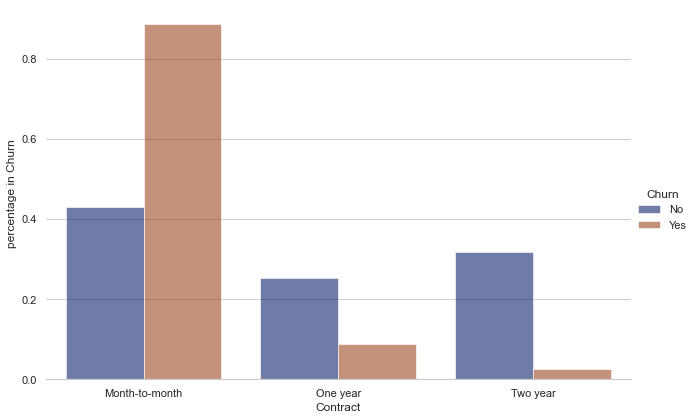

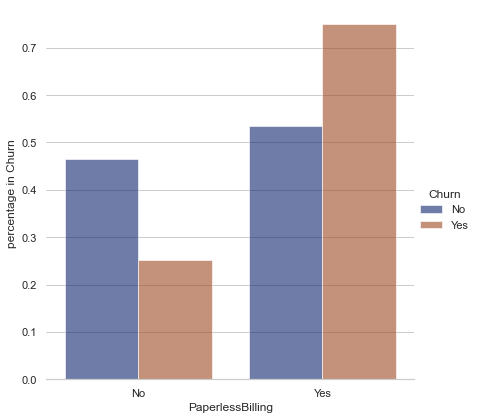

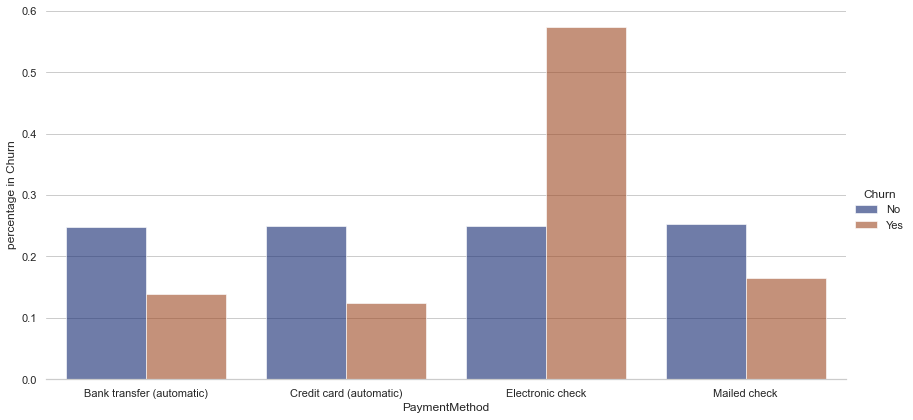

In [42]:
for col in ['Contract', 'PaperlessBilling', 'PaymentMethod']:
    cat_analysis(col, 'Churn')

First we can see that People who are in month-to-month billing are mode likely to churn than people in one year and two year contract. we can also see that people with one year contract churn rate are still significantly higher than people with two years contract. The month=to month churn naturally occur because people that are not sure about using our services would not choose month-to month contract. still we can persuade them to use one year or two year contract to make them used to the benefit of our services. On one year contract we can see the same pattern but with smaller frequency.

What is interesting in paperless billing is people who use paper billing (might increase the cost) are less likely to churn than people with paperless billing. We might explore why this is the case and if our paperless service have some drawbacks.

the same thing can be said about electronic check. the churn rate on this category is significanty higher  compared to the other categories. Maybe electronic check is not convenient as payement method and we can direct our customer into other payment methods. The same thing can be said to mailed check but in lesser degree.

## Corellation

<AxesSubplot:>

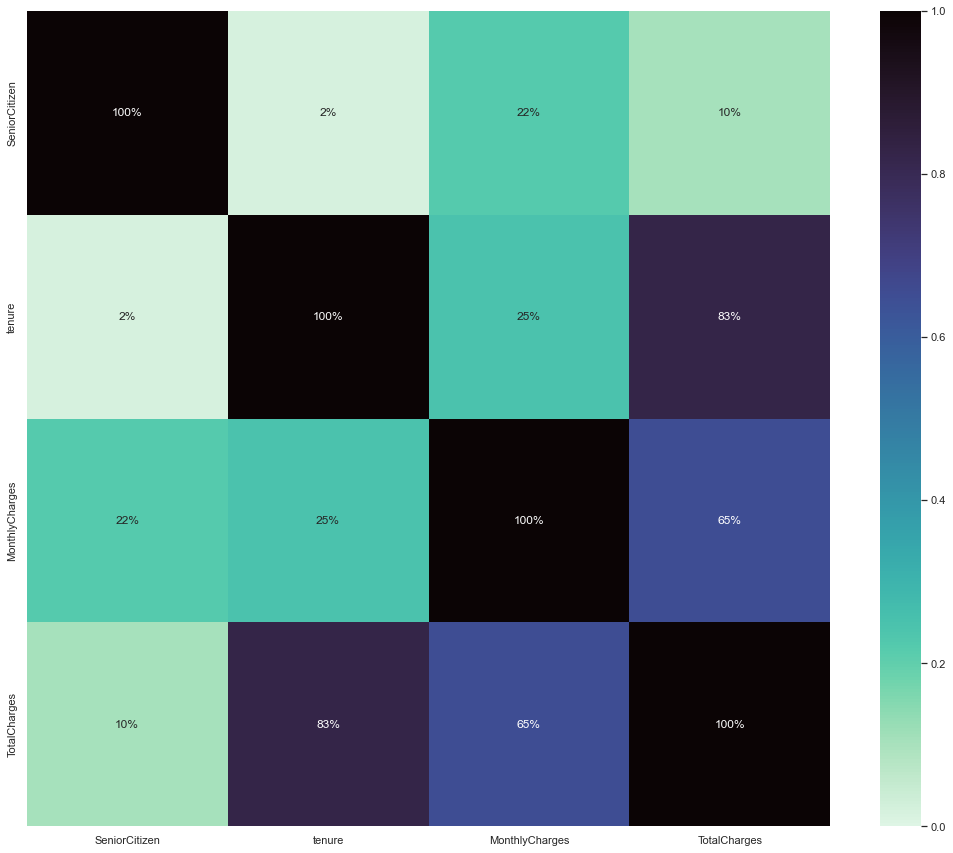

In [43]:
# Exploring corellation
cor_matrix = df.corr().abs()

plt.figure(figsize = (18,15))
sns.heatmap(cor_matrix, annot=True, fmt=".0%", vmin=0, vmax=1, cmap="mako_r")

From our analysis before we alreday conlude that total charges is tenure * monthly charges. so the corellation between total charges and the two features are high as expected.

The corellation in other features are quite low and we can safely use those in models based on regressin (like deep learning)

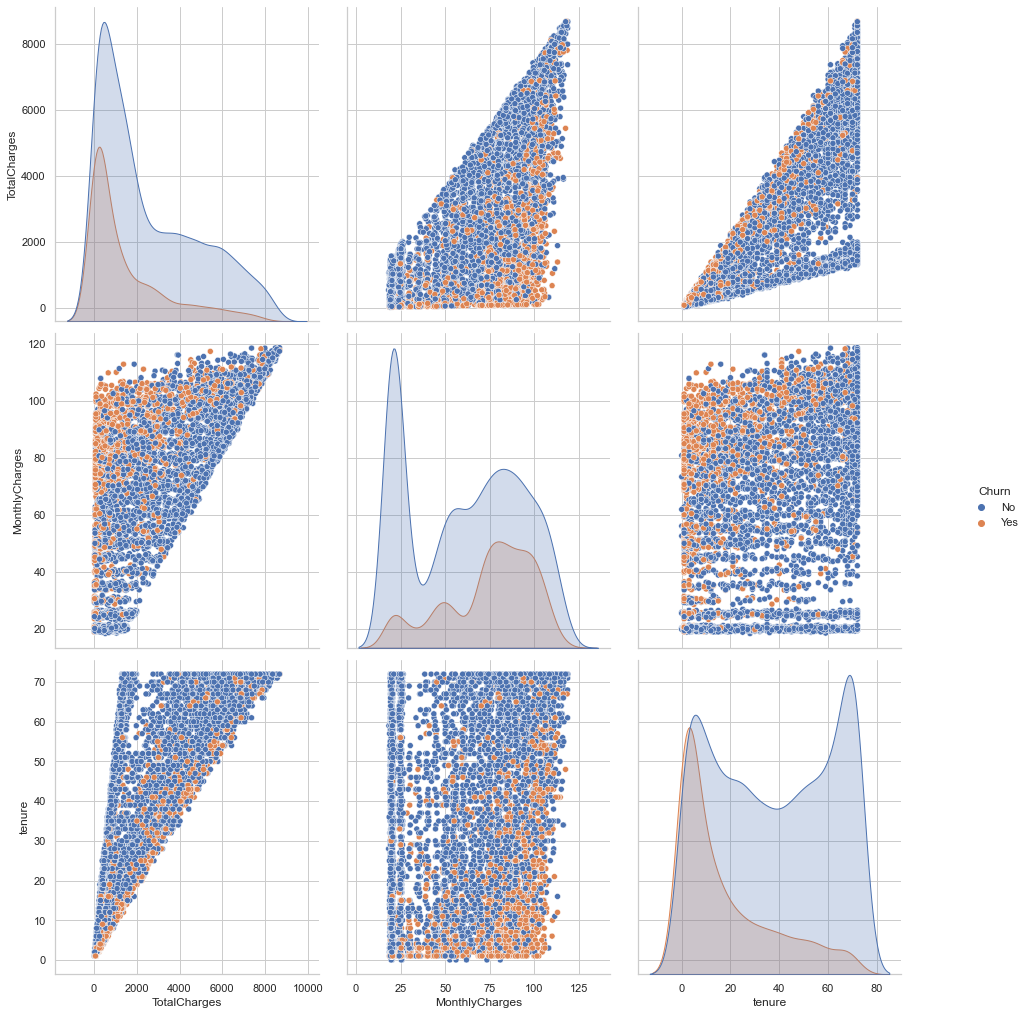

In [44]:
# Plotting Histogram and Scatter plots for every columnsb
g=sns.pairplot(df[col_num + ['Churn']],diag_kind='kde', hue='Churn')
g.fig.set_size_inches(15,15);

We can see some clusters in the scatter plots. for example, people wih higher monthly charge and lower tenure seems to be more likely to churn. similarly people with high monthly charge but low total charge seems to be more likely to churn. it seems that Tenure and monthly charge greatly impacts churn.

from the distribution we can see that both monthly charge and tenure distributuion are very diffrent as we already analyze above. most of the people who churn tenured for a short time but have high monthly charges. interestingly total charge distribution diffrence on the thicker tail for people who are not churned.

## Column Patterns

Now we want to detect the pattern of each columns and whether there are outliers and the types of outliers for each features. We also want to see if the features are normally distributed or not. this will be beneficial for outlier handling later and to gain insight into the data.

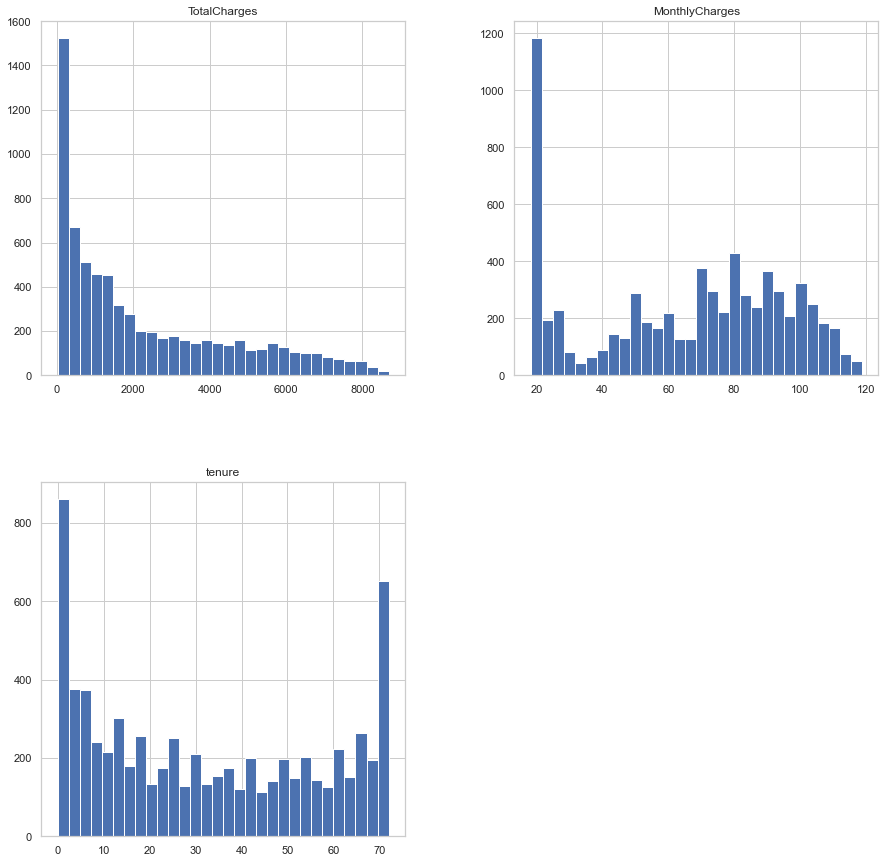

In [45]:
# plotting histogram for every numerical column
df[col_num + ['Churn']].hist(bins=30, figsize=(15, 15));

In [46]:
# skew for each column
for column in df.select_dtypes(include=np.number).columns: 
    print(column, 'Skewness Value : ', df[column].skew())

SeniorCitizen Skewness Value :  1.8336327440928564
tenure Skewness Value :  0.2395397495619829
MonthlyCharges Skewness Value :  -0.22052443394398033
TotalCharges Skewness Value :  0.961642499724251


In [47]:
# seperating by skewness
col_num_normal = [] 
col_num_skewed = []
col_num_skewed_extreme = []

for column in col_num:
    if abs(df[column].skew()) > 1:
        col_num_skewed_extreme.append(column)
    elif abs(df[column].skew()) > 0.5:
        col_num_skewed.append(column)
    else:
        col_num_normal.append(column)
        

print('extremely skewed: ', col_num_skewed_extreme) 
print('skewed:', col_num_skewed)
print('normal:', col_num_normal)

extremely skewed:  []
skewed: ['TotalCharges']
normal: ['MonthlyCharges', 'tenure']


As we can see from the histogram and the skewness total charges are skewed and the other two are normally distributed

next we want to define function to plot histograms and boxplots for each feature to detect outliers

In [48]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

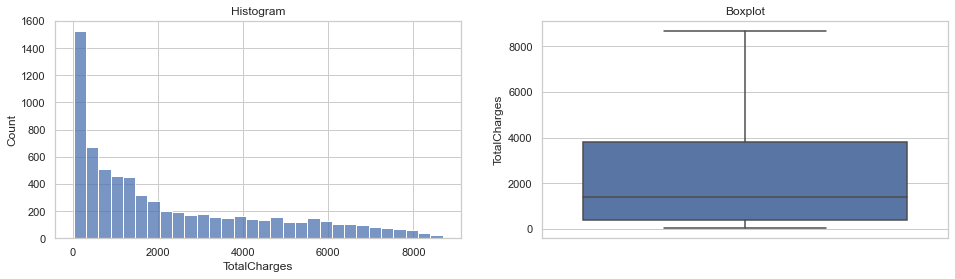


Skewness Value :  0.961642499724251


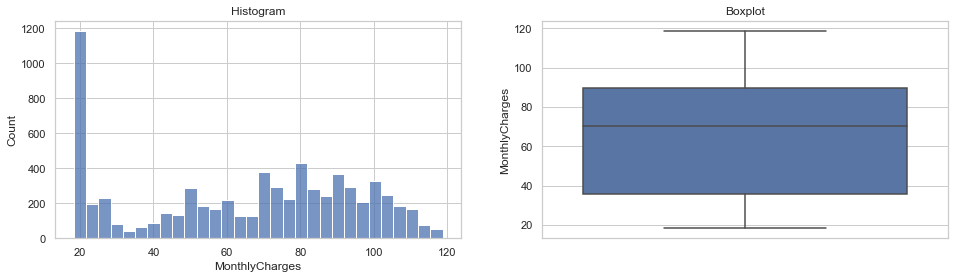


Skewness Value :  -0.22052443394398033


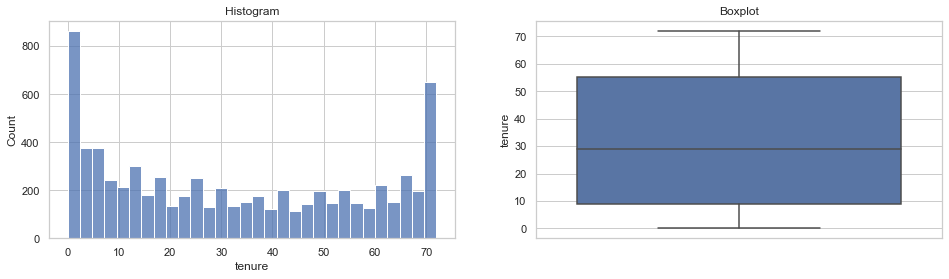


Skewness Value :  0.2395397495619829


In [49]:
for column in col_num: 
    diagnostic_plots(df, column)
    print('\nSkewness Value : ', df[column].skew())

In [50]:
def outlier_detector(df, column):
    # Creating upper and lower boundaries
    Q1 = df[column].quantile(0.25)

    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    upper = df[column] >= (Q3+1.5*IQR)
    lower = df[column] <= (Q1-1.5*IQR)
    
    upper_rat = upper.sum()/upper.count()
    lower_rat = lower.sum()/lower.count()
    
    # checking how many value and percent outside the boundaries
    return column, upper_rat, lower_rat

def outlier_lister(df, columns):
    
    outlier_list = []
    print("The outliers are:")
    for a in columns:
        
        col, upper_rat, lower_rat = outlier_detector(df,a)
        
        if upper_rat + lower_rat != 0:
            print(col, 'with outliers ratio of :' ,upper_rat + lower_rat)
            outlier_list.append(a)
    
    return outlier_list

outlier_list = outlier_lister(df, col_num);

The outliers are:


It seems that our data did not contain outliers.

# Data Preprocessing

Now we can get into data pre-processing. in this part, we will split the data for train, test and Infernce, and then we will handle outlier, and if any we will also handle missing values.

In [51]:
col_num

['TotalCharges', 'MonthlyCharges', 'tenure']

In [52]:
col_cat = [col for col in col_cat if col not in ['Churn']]
col_cat

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

## Get Data for Model Inference

In [53]:
# Data Shape
df.shape

(7043, 21)

Since we only got 300 data rows, I want to maximize the data for train so I choose to only take 10 rows for inference.

In [54]:
# Get Data for Model Inference
data_inf = df.sample(10, random_state=21)

# Remove Inference-Set from Dataset
data_train_test = df.drop(data_inf.index)

# Reset index and split data inference into X and y
data_inf = data_inf.reset_index(drop=True)

X_data_inf = data_inf.drop('Churn', axis=1)
y_data_inf = data_inf['Churn']

print('Test Size  : ', data_inf.shape)

Test Size  :  (10, 21)


From the data, I'll split 10 rows as inference. This will helps us check wheter our model will run or not.

## Splitting Dataset

In [55]:
# Setting price as target (y) and other data as features(X) 
X = data_train_test.drop('Churn', axis=1)
y = data_train_test['Churn']

col_X = X.columns

# Splitting Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=99)

# Splitting Train and Test datasets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=21)

print('Train Size : ', X_train.shape)
print('Validation Size : ', X_val.shape)
print('Test Size  : ', X_test.shape)
print('Inference Size  : ', X_data_inf.shape)

Train Size :  (5696, 20)
Validation Size :  (633, 20)
Test Size  :  (704, 20)
Inference Size  :  (10, 20)


After we split the inference, then we need to split train and test datasets. I choose to take 10% data as test and 90% as train. and then I use 10% of the train as validation. once again i want to maximize train data in this model 

## Handling Outlier

In [56]:
# Outliers column
outlier_list = [col for col in outlier_list if col not in ['Churn']]
outlier_list

[]

We dont have outliers

In [57]:
for column in outlier_list: 
    diagnostic_plots(X_train_censored, column)
    print('\nSkewness Value : ', X_train[column].skew())

In [58]:
X_train_censored = X_train
X_test_censored = X_test
X_val_censored = X_val

After handling, we can see that our outliers are removed our data.

As we can see, there is no missing values in our the data. so we dont need to handle missing values.

## Handling Missing Values

Since we already have complete data without missing values (since all missing values are 0), and since our inference (presummably for future countries data) will not have missing values, we can skip missing values handling on this dataset.

In [59]:
# No need to handle missing values, data dont have Nan
X_train_censored_nonan = X_train_censored
X_test_censored_nonan = X_test_censored
X_val_censored_nonan = X_val_censored

## Feature Selection

### 1. Reasoning

As our analysis before, we can list our feature as:

In [60]:
# Printing features as previosly filtered
def column_type_check():    
    print('All Col :',df.columns.tolist())

    print('')

    print('Categorical features :')
    print('Ordinal :', col_cat_ordinal)
    print('Nominal :', col_cat_nominal)

    print('')

    print('Numerical features :')
    print('Normal :', col_num_normal)
    print('Skewed :', col_num_skewed)
    print('Exremely Skewed :', col_num_skewed_extreme)
    
column_type_check()    

All Col : ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Categorical features :
Ordinal : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Nominal : ['gender', 'Partner', 'Dependents', 'PaymentMethod']

Numerical features :
Normal : ['MonthlyCharges', 'tenure']
Skewed : ['TotalCharges']
Exremely Skewed : []


from the feature above I choose to drop, 'PhoneService', 'StreamingMovies', 'OnlineBackup', and 'DeviceProtection' because we the pattern is quite similar and we only one of each in our model.

I'll also drop 'gender' because it's corellation to churn is insignificat.

In [61]:
# Listing features to drop
to_drop = ['Churn', 'gender', 'PhoneService', 'StreamingMovies', 'OnlineBackup', 'DeviceProtection']

# Dropping features from column data type  lists 
col_num_process = [col for col in col_num if col not in to_drop]
col_cat_process = [col for col in col_cat if col not in to_drop]

col_num_normal = [col for col in col_num_normal if col not in to_drop]
col_num_skewed = [col for col in col_num_skewed if col not in to_drop]
col_num_skewed_extreme = [col for col in col_num_skewed_extreme if col not in to_drop]

col_cat_ordinal = [col for col in col_cat_ordinal if col not in to_drop]
col_cat_nominal = [col for col in col_cat_nominal if col not in to_drop]

In [62]:
col_cat_process

['SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'TechSupport',
 'StreamingTV',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [63]:
# Listing dropped features
[col for col in df.columns.tolist() if col not in (col_cat_ordinal+col_cat_nominal+col_num_normal+col_num_skewed+col_num_skewed_extreme)]

['customerID',
 'gender',
 'PhoneService',
 'OnlineBackup',
 'DeviceProtection',
 'StreamingMovies',
 'Churn']

In [64]:
# Printing features as previosly filtered
column_type_check()

All Col : ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Categorical features :
Ordinal : ['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Nominal : ['Partner', 'Dependents', 'PaymentMethod']

Numerical features :
Normal : ['MonthlyCharges', 'tenure']
Skewed : ['TotalCharges']
Exremely Skewed : []


### 2. Split between Numerical Columns and Categorical Columns

In code below we split the columns by our choosen class like we described above

In [65]:
# Spliting numerical columns into normal, skewed and extremely skewed
X_train_normal = X_train_censored_nonan[col_num_normal]
X_test_normal = X_test_censored_nonan[col_num_normal]
X_val_normal = X_val_censored_nonan[col_num_normal]

X_train_skewed = X_train_censored_nonan[col_num_skewed]
X_test_skewed = X_test_censored_nonan[col_num_skewed]
X_val_skewed = X_val_censored_nonan[col_num_skewed]

X_train_skewed_extreme = X_train_censored_nonan[col_num_skewed_extreme]
X_test_skewed_extreme = X_test_censored_nonan[col_num_skewed_extreme]
X_val_skewed_extreme = X_val_censored_nonan[col_num_skewed_extreme]

# Splitting categorical columns into ordinal and nominal
X_train_ordinal = X_train_censored_nonan[col_cat_ordinal]
X_test_ordinal = X_test_censored_nonan[col_cat_ordinal]
X_val_ordinal = X_val_censored_nonan[col_cat_ordinal]

X_train_nominal = X_train_censored_nonan[col_cat_nominal]
X_test_nominal = X_test_censored_nonan[col_cat_nominal]
X_val_nominal = X_val_censored_nonan[col_cat_nominal]

## Scaling and Encoding

### Numerical Data

In [66]:
# Scaling Algorithms
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

processed_data = []
for data_numerical in [X_train_normal, X_train_skewed, X_train_skewed_extreme]:
    if data_numerical.empty == False:
        if data_numerical.equals(X_train_normal):
            standard_scaler.fit(X_train_normal)
            X_train_normal_scaled = standard_scaler.transform(X_train_normal)
            X_test_normal_scaled = standard_scaler.transform(X_test_normal)
            X_val_normal_scaled = standard_scaler.transform(X_val_normal)
            processed_data.append('normal')
            
        if data_numerical.equals(X_train_skewed):
            minmax_scaler.fit(X_train_skewed)
            X_train_skewed_scaled = minmax_scaler.transform(X_train_skewed)
            X_test_skewed_scaled = minmax_scaler.transform(X_test_skewed)
            X_val_skewed_scaled = minmax_scaler.transform(X_val_skewed)
            processed_data.append('skewed')
            
        if data_numerical.equals(X_train_skewed_extreme):
            robust_scaler.fit(X_train_skewed_extreme)
            X_train_skewed_extreme_scaled = robust_scaler.transform(X_train_skewed_extreme)
            X_test_skewed_extreme_scaled = robust_scaler.transform(X_test_skewed_extreme)
            X_val_skewed_extreme_scaled = robust_scaler.transform(X_val_skewed_extreme)
            processed_data.append('skewed_extreme')

We are using Standard Scaler for normally distributed data, MinMax scaler for skewed data and robust scaler for extremely skewed data. Each scaler are designed for specific function and we are splitting our data accordingly to achieve optimal value for our model.

### Categorical Data

In [67]:
# Feature Encoding using OrdinalEcoder and OneHotEncoder
ordinal_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder()

for data_categorical in [X_train_ordinal, X_train_nominal]:
    if data_categorical.empty == False:
        if data_categorical.equals(X_train_ordinal):
            ordinal_encoder.fit(X_train_ordinal)
            X_train_ordinal_encoded = ordinal_encoder.transform(X_train_ordinal)
            X_test_ordinal_encoded = ordinal_encoder.transform(X_test_ordinal)
            X_val_ordinal_encoded = ordinal_encoder.transform(X_val_ordinal)
            processed_data.append('ordinal')
            
        if data_categorical.equals(X_train_nominal):
            onehot_encoder.fit(X_train_nominal)
            X_train_nominal_encoded = onehot_encoder.transform(X_train_nominal)
            X_test_nominal_encoded = onehot_encoder.transform(X_test_nominal)
            X_val_nominal_encoded = onehot_encoder.transform(X_val_nominal)
            processed_data.append('nominal')

In [68]:
# Feature Encoding using OrdinalEcoder and OneHotEncoder
ordinal_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder()
label_encoder = LabelEncoder()

ordinal_encoder.fit(X_train_ordinal)
onehot_encoder.fit(X_train_nominal)


X_train_ordinal_encoded = ordinal_encoder.transform(X_train_ordinal)
X_test_ordinal_encoded = ordinal_encoder.transform(X_test_ordinal)

X_train_nominal_encoded = onehot_encoder.transform(X_train_nominal).toarray()
X_test_nominal_encoded = onehot_encoder.transform(X_test_nominal).toarray()

# Target Encoding using labelEncoder

## No = 0, Yes = 1
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

For categorical data, we are using ordinal encoder for ordinal data and OneHot encoder for nominal data. as the scaler, these encoder are design for are designed for specific function and we are splitting our data accordingly to achieve optimal value for our model.

In [69]:
col_cat_nominal

['Partner', 'Dependents', 'PaymentMethod']

### Concating Data for Modeling

In [70]:
processed_data

['normal', 'skewed', 'ordinal', 'nominal']

In [71]:
for i in [X_train_normal_scaled, X_train_skewed_scaled, X_train_ordinal_encoded, X_train_nominal_encoded]:
    print(type(i))
    print(i.shape)

<class 'numpy.ndarray'>
(5696, 2)
<class 'numpy.ndarray'>
(5696, 1)
<class 'numpy.ndarray'>
(5696, 11)
<class 'numpy.ndarray'>
(5696, 8)


In [72]:
X_train_nominal_encoded

array([[0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [73]:
X_val_nominal_encoded

<633x8 sparse matrix of type '<class 'numpy.float64'>'
	with 1899 stored elements in Compressed Sparse Row format>

In [74]:
# Concating data as array
X_train_final = np.concatenate([X_train_normal_scaled, X_train_skewed_scaled, X_train_ordinal_encoded, X_train_nominal_encoded], axis=1)
X_test_final = np.concatenate([X_test_normal_scaled, X_test_skewed_scaled, X_test_ordinal_encoded, X_test_nominal_encoded], axis=1)
X_val_final = np.concatenate([X_val_normal_scaled, X_val_skewed_scaled, X_val_ordinal_encoded, X_val_nominal_encoded.toarray()], axis=1)

In [75]:
# Defining column names
column_names = [col_num_normal+col_num_skewed+col_num_skewed_extreme+col_cat_ordinal+['onehot']*8]

In [76]:
# Model to dataframe
X_train_final_df = pd.DataFrame(X_train_final, columns=column_names)
X_test_final_df = pd.DataFrame(X_test_final, columns=column_names)

After making sure that all of our manual pre-processing is robust, we can continue to Pipline to wrap our model using all transformer above

## Creating Pipeline

Because we want to analyze multiple models, we can use pipeline to make the process easier and more automated. first I will re-define all the codes that we study beforehand.

In [77]:
# Outlier Handling

# Scaling Algorithms
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
#robust_scaler = RobustScaler()

# Feature Encoding using OrdinalEcoder and OneHotEncoder
ordinal_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder()

# Preprocessing column transformer
normalizer = ColumnTransformer(transformers=[
        ("normal", standard_scaler, col_num_normal ),
        #("num_skewed", minmax_scaler, col_num_skewed),
        #("num_skewed_extreme", robust_scaler, col_num_skewed_extreme),
    
        #("cat_ordinal", ordinal_encoder, col_cat_ordinal),
        ("cat_nominal", onehot_encoder, col_cat_nominal)
])

pre_pipe = make_pipeline(normalizer)

Lets apply our preprocessing pipeline

In [78]:
X_train_preprocessed = pre_pipe.fit_transform(X_train)
X_test_preprocessed = pre_pipe.transform(X_test)
X_val_preprocessed = pre_pipe.transform(X_val)


In [79]:
X_train_preprocessed.shape[1]

10

Next we'll define each pipeline for every algorithm that we would use

# Model Definition

In this project, We would try to make two Artificial Neural Network model, with Sequential API and Functional API. But before that we will make pipeline to optimize our data feeding

## Tensorflow Pipeline

In [80]:
train_data_tf = tf.data.Dataset.from_tensor_slices((X_train_preprocessed, y_train_encoded)).batch(64)
test_data_tf = tf.data.Dataset.from_tensor_slices((X_test_preprocessed, y_test_encoded)).batch(64)
val_data_tf = tf.data.Dataset.from_tensor_slices((X_val_preprocessed, y_val_encoded)).batch(64)

We will make two model per api and then we will try to optimize both model by using grid search.

## Initial Sequential API Model

In [81]:
# Model Architecture
model_seq = tf.keras.models.Sequential()
model_seq.add(tf.keras.layers.Input(shape=(X_train_preprocessed.shape[1])))
model_seq.add(tf.keras.layers.Dense(8, activation="relu"))
model_seq.add(tf.keras.layers.Dense(4, activation="relu")) 
model_seq.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Model Compile
model_seq.compile(loss='binary_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

In [82]:
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 88        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


## Initial Functional API Model

In [83]:
input_ = tf.keras.layers.Input(shape=X_train_preprocessed.shape[1],)
hidden1 = tf.keras.layers.Dense(8, activation="relu")(input_)
hidden2 = tf.keras.layers.Dense(4, activation="relu")(hidden1)
#concat = tf.keras.layers.concatenate([input_, hidden2])
output = tf.keras.layers.Dense(1, activation='sigmoid')(hidden2)
model_func = tf.keras.models.Model(inputs=[input_], outputs=[output])

model_func.compile(loss='binary_crossentropy',
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics=['accuracy'])

model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_3 (Dense)             (None, 8)                 88        
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


# Model Training

## Sequential API Model

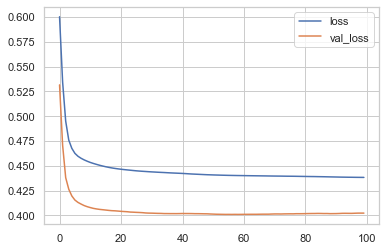

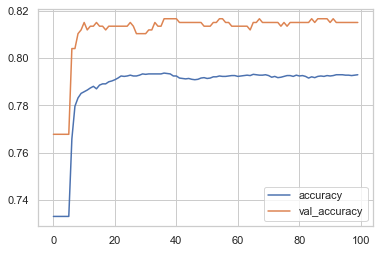

In [84]:
history_seq = model_seq.fit(train_data_tf,
                        epochs=100,
                        validation_data=val_data_tf,
                        verbose=0
                       )

metrics = pd.DataFrame(history_seq.history)
metrics[['loss', 'val_loss']].plot();
metrics[['accuracy', 'val_accuracy']].plot();

We an see that our model improve but reach its peak at around 40 epoch

## Functional API Model

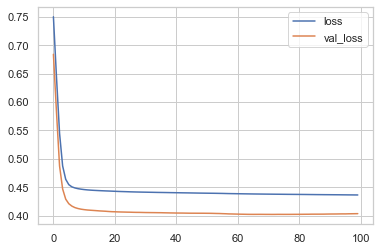

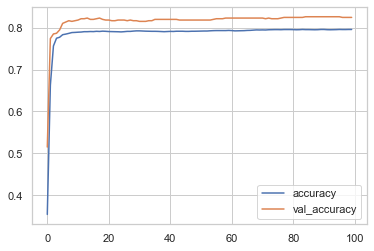

In [85]:
history_func = model_func.fit(train_data_tf,
                              epochs=100,
                              validation_data=val_data_tf,
                              verbose=0
                              )

metrics = pd.DataFrame(history_func.history)
metrics[['loss', 'val_loss']].plot();
metrics[['accuracy', 'val_accuracy']].plot();

We an see the same thing here but that our model reach its peak faster at around 30 epoch

# Model Improvement

Hyperparamter Tuning Search Code Adapted From:
https://www.tensorflow.org/tensorboard/hyperparameter_tuning_with_hparams.

I tried to do hyper parameter tuning with several parameters.

## Sequencial API Model

In [88]:
HP_NUM_UNITS1 = hp.HParam('num_units1', hp.Discrete([8, 16]))
HP_NUM_UNITS2 = hp.HParam('num_units2', hp.Discrete([2, 4]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.2))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
    hp.hparams_config(
    hparams=[HP_NUM_UNITS1, HP_NUM_UNITS2, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
    )

In [89]:
def train_test_model(hparams):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(X_train_preprocessed.shape[1],)),
        tf.keras.layers.Dense(hparams[HP_NUM_UNITS1], activation=tf.nn.relu),
        tf.keras.layers.Dense(hparams[HP_NUM_UNITS2], activation=tf.nn.relu),
        tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
        tf.keras.layers.Dense(1, activation=tf.nn.sigmoid),
    ])
    model.compile(
      optimizer=hparams[HP_OPTIMIZER],
      loss='binary_crossentropy',
      metrics=['accuracy'],
    )

    history = model.fit(X_train_preprocessed, y_train_encoded, 
              validation_data=(X_val_preprocessed, y_val_encoded),
              epochs=100,
              verbose = 0) 
    _, accuracy = model.evaluate(X_val_preprocessed, y_val_encoded)
    
    return accuracy, history

In [90]:
def run(run_dir, hparams):
    with tf.summary.create_file_writer(run_dir).as_default():
        hp.hparams(hparams)  # record the values used in this trial
        accuracy, history = train_test_model(hparams)
        tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)
        return accuracy, history

In [91]:
session_num = 0
result = []
histories = []

for num_units1 in HP_NUM_UNITS1.domain.values:
    for num_units2 in HP_NUM_UNITS2.domain.values:
        for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
            for optimizer in HP_OPTIMIZER.domain.values:
                hparams = {
                  HP_NUM_UNITS1: num_units1,
                  HP_NUM_UNITS2: num_units2,
                  HP_DROPOUT: dropout_rate,
                  HP_OPTIMIZER: optimizer,
                }
                run_name = "run-%d" % session_num
                print('--- Starting trial: %s' % run_name)
                print({h.name: hparams[h] for h in hparams})
                accuracy, history = run('logs/hparam_tuning' + run_name, hparams)
                
                result = result + [[hparams, accuracy]]
                histories = histories + [[history.params, history.history]]
                                
                session_num += 1

--- Starting trial: run-0
{'num_units1': 8, 'num_units2': 2, 'dropout': 0.1, 'optimizer': 'adam'}
20/20 [==============================] - 0s 1ms/step - loss: 0.4009 - accuracy: 0.8088
--- Starting trial: run-1
{'num_units1': 8, 'num_units2': 2, 'dropout': 0.1, 'optimizer': 'sgd'}
20/20 [==============================] - 0s 1ms/step - loss: 0.4078 - accuracy: 0.8088
--- Starting trial: run-2
{'num_units1': 8, 'num_units2': 2, 'dropout': 0.2, 'optimizer': 'adam'}
20/20 [==============================] - 0s 1ms/step - loss: 0.4042 - accuracy: 0.8136
--- Starting trial: run-3
{'num_units1': 8, 'num_units2': 2, 'dropout': 0.2, 'optimizer': 'sgd'}
20/20 [==============================] - 0s 1ms/step - loss: 0.4101 - accuracy: 0.7994
--- Starting trial: run-4
{'num_units1': 8, 'num_units2': 4, 'dropout': 0.1, 'optimizer': 'adam'}
20/20 [==============================] - 0s 1ms/step - loss: 0.4038 - accuracy: 0.8088
--- Starting trial: run-5
{'num_units1': 8, 'num_units2': 4, 'dropout': 0.1, 

In [93]:
result_seq_df = pd.DataFrame(result, columns=('param', 'accuracy'))
result_seq_df_top_3 = result_seq_df.sort_values(by=['accuracy'], ascending=False).head(3)

result_seq_df_top_3

,param,accuracy
5,"{<HParam 'num_units1': {8, 16}>: 8, <HParam 'n...",0.815166
2,"{<HParam 'num_units1': {8, 16}>: 8, <HParam 'n...",0.813586
8,"{<HParam 'num_units1': {8, 16}>: 16, <HParam '...",0.810427


In [114]:
result[9][0]

{HParam(name='num_units1', domain=Discrete([8, 16]), display_name=None, description=None): 16,
 HParam(name='num_units2', domain=Discrete([2, 4]), display_name=None, description=None): 2,
 HParam(name='dropout', domain=RealInterval(0.1, 0.2), display_name=None, description=None): 0.1,
 HParam(name='optimizer', domain=Discrete(['adam', 'sgd']), display_name=None, description=None): 'sgd'}

Lets apply those values

In [115]:
model_seq_tuned =   tf.keras.models.Sequential([
                    tf.keras.layers.Input(shape=(X_train_preprocessed.shape[1],)),
                    tf.keras.layers.Dense(16, activation=tf.nn.relu),
                    tf.keras.layers.Dense(2, activation=tf.nn.relu),
                    tf.keras.layers.Dropout(0.1),
                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model_seq_tuned.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

history_seq_tuned = model_seq_tuned.fit(X_train_preprocessed, y_train_encoded, 
          validation_data=(X_val_preprocessed, y_val_encoded),
          epochs=100,
          verbose = 0
) 


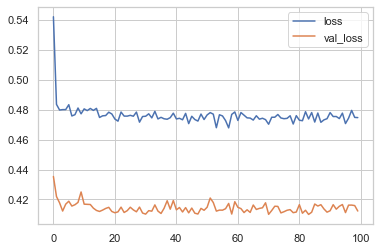

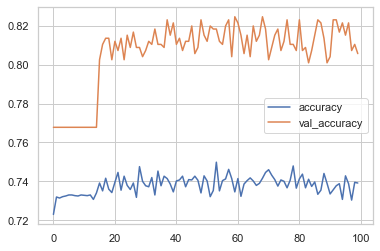

In [116]:
metrics = pd.DataFrame(history_seq_tuned.history)
metrics[['loss', 'val_loss']].plot();
metrics[['accuracy', 'val_accuracy']].plot();

## Functional API Model

In [117]:
HP_NUM_UNITS1 = hp.HParam('num_units1', hp.Discrete([8, 16]))
HP_NUM_UNITS2 = hp.HParam('num_units2', hp.Discrete([2, 4]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.2))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
    hp.hparams_config(
    hparams=[HP_NUM_UNITS1, HP_NUM_UNITS2, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
    )

In [118]:
def train_test_model(hparams):
    input_ = tf.keras.layers.Input(shape=X_train_preprocessed.shape[1],)
    hidden1 = tf.keras.layers.Dense(hparams[HP_NUM_UNITS1], activation="relu")(input_)
    hidden2 = tf.keras.layers.Dense(hparams[HP_NUM_UNITS1], activation="relu")(hidden1)
    dropout1 = tf.keras.layers.Dropout(hparams[HP_DROPOUT])(hidden2)
    #concat = tf.keras.layers.concatenate([input_, hidden2])
    output = tf.keras.layers.Dense(1, activation='sigmoid')(dropout1)

    model = tf.keras.models.Model(inputs=[input_], outputs=[output])

    model.compile(loss='binary_crossentropy',
                       optimizer=hparams[HP_OPTIMIZER],
                       metrics=['accuracy']
                 )

    

    history = model.fit(X_train_preprocessed, y_train_encoded, 
              validation_data=(X_val_preprocessed, y_val_encoded),
              epochs=100,
              verbose = 0) 
    _, accuracy = model.evaluate(X_val_preprocessed, y_val_encoded)
    
    return accuracy, history

In [119]:
def run(run_dir, hparams):
    with tf.summary.create_file_writer(run_dir).as_default():
        hp.hparams(hparams)  # record the values used in this trial
        accuracy, history = train_test_model(hparams)
        tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)
        return accuracy, history

In [120]:
session_num = 0
result = []
histories = []

for num_units1 in HP_NUM_UNITS1.domain.values:
    for num_units2 in HP_NUM_UNITS2.domain.values:
        for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
            for optimizer in HP_OPTIMIZER.domain.values:
                hparams = {
                  HP_NUM_UNITS1: num_units1,
                  HP_NUM_UNITS2: num_units2,
                  HP_DROPOUT: dropout_rate,
                  HP_OPTIMIZER: optimizer,
                }
                run_name = "run-%d" % session_num
                print('--- Starting trial: %s' % run_name)
                print({h.name: hparams[h] for h in hparams})
                accuracy, history = run('logs/hparam_tuning' + run_name, hparams)
                
                result = result + [[hparams, accuracy]]
                histories = histories + [[history.params, history.history]]
                                
                session_num += 1

--- Starting trial: run-0
{'num_units1': 8, 'num_units2': 2, 'dropout': 0.1, 'optimizer': 'adam'}
20/20 [==============================] - 0s 1ms/step - loss: 0.3982 - accuracy: 0.8073
--- Starting trial: run-1
{'num_units1': 8, 'num_units2': 2, 'dropout': 0.1, 'optimizer': 'sgd'}
20/20 [==============================] - 0s 1ms/step - loss: 0.3996 - accuracy: 0.8120
--- Starting trial: run-2
{'num_units1': 8, 'num_units2': 2, 'dropout': 0.2, 'optimizer': 'adam'}
20/20 [==============================] - 0s 1ms/step - loss: 0.4017 - accuracy: 0.8088
--- Starting trial: run-3
{'num_units1': 8, 'num_units2': 2, 'dropout': 0.2, 'optimizer': 'sgd'}
20/20 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.8057
--- Starting trial: run-4
{'num_units1': 8, 'num_units2': 4, 'dropout': 0.1, 'optimizer': 'adam'}
20/20 [==============================] - 0s 1ms/step - loss: 0.4010 - accuracy: 0.8009
--- Starting trial: run-5
{'num_units1': 8, 'num_units2': 4, 'dropout': 0.1, 

In [122]:
# Result of gridsearch
# %tensorboard --logdir logs/hparam_tuning

result= np.array(result)
result_func_df = pd.DataFrame(result, columns=('param', 'accuracy'))
result_func_df_top_3 = result_func_df.sort_values(by=['accuracy'], ascending=False).head(3)
result_func_df_top_3

,param,accuracy
6,"{<HParam 'num_units1': {8, 16}>: 8, <HParam 'n...",0.813586
1,"{<HParam 'num_units1': {8, 16}>: 8, <HParam 'n...",0.812006
9,"{<HParam 'num_units1': {8, 16}>: 16, <HParam '...",0.812006


In [126]:
result[9][0]

{HParam(name='num_units1', domain=Discrete([8, 16]), display_name=None, description=None): 16,
 HParam(name='num_units2', domain=Discrete([2, 4]), display_name=None, description=None): 2,
 HParam(name='dropout', domain=RealInterval(0.1, 0.2), display_name=None, description=None): 0.1,
 HParam(name='optimizer', domain=Discrete(['adam', 'sgd']), display_name=None, description=None): 'sgd'}

Lets apply those values

In [127]:
input_ = tf.keras.layers.Input(shape=X_train_preprocessed.shape[1],)
hidden1 = tf.keras.layers.Dense(16, activation="relu")(input_)
hidden2 = tf.keras.layers.Dense(2, activation="relu")(hidden1)
dropout1 = tf.keras.layers.Dropout(0.1)(hidden2)
#concat = tf.keras.layers.concatenate([input_, hidden2])
output = tf.keras.layers.Dense(1, activation='sigmoid')(dropout1)

model_func_tuned =   tf.keras.models.Model(inputs=[input_], outputs=[output])

model_func_tuned.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

history_func_tuned = model_func_tuned.fit(X_train_preprocessed, y_train_encoded, 
          validation_data=(X_val_preprocessed, y_val_encoded),
          epochs=100,
          verbose = 0
) 


In [128]:
history_func_tuned = model_func_tuned.fit(X_train_preprocessed, y_train_encoded, 
          validation_data=(X_val_preprocessed, y_val_encoded),
          epochs=100,
          verbose = 0
) 

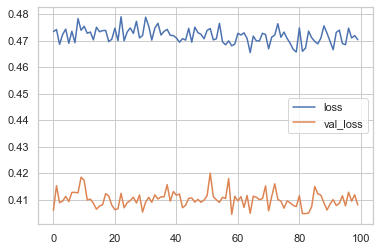

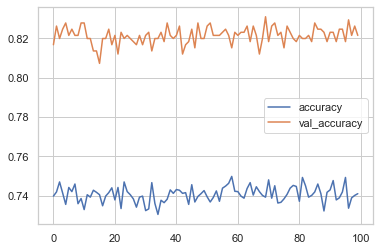

In [129]:
metrics = pd.DataFrame(history_func_tuned.history)
metrics[['loss', 'val_loss']].plot();
metrics[['accuracy', 'val_accuracy']].plot();

# Model Evaluation

Now lets compare our four models. Lets set our models for evaluation

In [130]:
model_dict= {
            'sequential_initial' : model_seq,
            'functional_initial' : model_func,
            'sequential_tuned' : model_seq_tuned,
            'functional_tuned' : model_func_tuned,
            }

In [131]:
prediction_result = {}

for pipe in model_dict.values():
    nested_dict = {}
    
    y_train_pred = pipe.predict(X_train_preprocessed)
    y_train_pred = np.where(y_train_pred >= 0.5, 1, 0)
    
    y_test_pred = pipe.predict(X_test_preprocessed)
    y_test_pred = np.where(y_test_pred >= 0.5, 1, 0)
    
    nested_dict['y_train_pred'] = y_train_pred
    nested_dict['y_test_pred'] = y_test_pred
    
    prediction_result[pipe] = nested_dict;

22/22 [==============================] - 0s 940us/step


In [132]:
def evaluation_random_search(pipe):
    print('Train Classification Result: \n', classification_report(y_train_encoded, prediction_result[pipe]['y_train_pred']))
    print('Test Classification Result: \n', classification_report(y_test_encoded, prediction_result[pipe]['y_test_pred']))
    
    print('Confusion Matrix:')
    cm = confusion_matrix(y_test_encoded,prediction_result[pipe]['y_test_pred'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_.tolist())
    
    disp.plot()
    plt.show()

    print('roc_auc_score :', roc_auc_score(y_test_encoded, prediction_result[pipe]['y_test_pred']))  

### Model Evaluation Result

---------------------------------------------------------------------------------------------------- 

Classification Result for sequential_initial :
Train Classification Result: 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      4175
           1       0.65      0.48      0.55      1521

    accuracy                           0.79      5696
   macro avg       0.74      0.69      0.71      5696
weighted avg       0.78      0.79      0.78      5696

Test Classification Result: 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       508
           1       0.62      0.50      0.55       196

    accuracy                           0.78       704
   macro avg       0.72      0.69      0.70       704
weighted avg       0.76      0.78      0.77       704

Confusion Matrix:


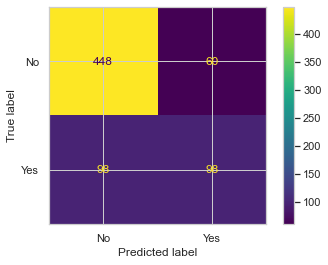

roc_auc_score : 0.6909448818897637
---------------------------------------------------------------------------------------------------- 

Classification Result for functional_initial :
Train Classification Result: 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      4175
           1       0.64      0.51      0.57      1521

    accuracy                           0.79      5696
   macro avg       0.74      0.70      0.71      5696
weighted avg       0.78      0.79      0.78      5696

Test Classification Result: 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       508
           1       0.62      0.49      0.55       196

    accuracy                           0.78       704
   macro avg       0.72      0.69      0.70       704
weighted avg       0.76      0.78      0.77       704

Confusion Matrix:


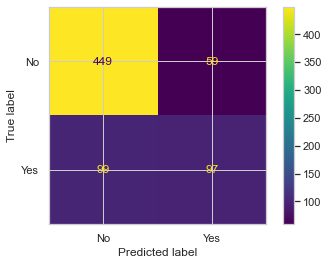

roc_auc_score : 0.6893781134501045
---------------------------------------------------------------------------------------------------- 

Classification Result for sequential_tuned :
Train Classification Result: 
               precision    recall  f1-score   support

           0       0.81      0.92      0.87      4175
           1       0.67      0.42      0.52      1521

    accuracy                           0.79      5696
   macro avg       0.74      0.67      0.69      5696
weighted avg       0.77      0.79      0.77      5696

Test Classification Result: 
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       508
           1       0.66      0.44      0.53       196

    accuracy                           0.78       704
   macro avg       0.73      0.68      0.69       704
weighted avg       0.77      0.78      0.77       704

Confusion Matrix:


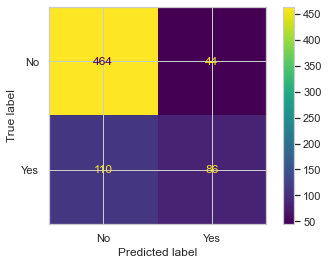

roc_auc_score : 0.6760806684878676
---------------------------------------------------------------------------------------------------- 

Classification Result for functional_tuned :
Train Classification Result: 
               precision    recall  f1-score   support

           0       0.82      0.91      0.87      4175
           1       0.66      0.47      0.55      1521

    accuracy                           0.79      5696
   macro avg       0.74      0.69      0.71      5696
weighted avg       0.78      0.79      0.78      5696

Test Classification Result: 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       508
           1       0.68      0.48      0.56       196

    accuracy                           0.79       704
   macro avg       0.75      0.70      0.71       704
weighted avg       0.78      0.79      0.78       704

Confusion Matrix:


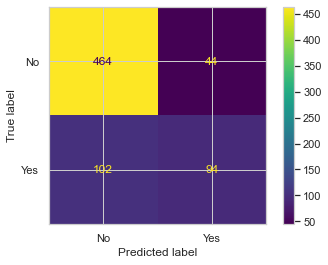

roc_auc_score : 0.6964888317531738


In [133]:
for name, model in model_dict.items():
    print('-'*100,'\n')
    print('Classification Result for', name, ':')
    evaluation_random_search(model)

We can see from our evaluations, all of the model seems to show signs of overfitting. the best train score that we can get is from both tuned model but their predicttion are very bad at perdiciting churn. The highest roc-auc value is achived by functional tuned model.

but some notes that our dataset is small and our deep learning is not that deep so the result is not that consistnat


# Model Inference

In [139]:
# Export preprocessor
with open('preprocessor.pkl', 'wb') as pipe_file:
    pickle.dump(pre_pipe, pipe_file)
    
# Export Model
model_seq.save('model.h5')

# Reload Model
with open ('preprocessor.pkl', 'rb') as f:
    preprocessor_loaded = pickle.load(f)
    
model_loaded = tf.keras.models.load_model("model.h5")

In [140]:
#transform data for inference
y_data_inf_encoded = label_encoder.transform(y_data_inf)

X_data_inf_preprocessed = preprocessor_loaded.transform(X_data_inf)
y_data_inf_pred = model_loaded.predict(X_data_inf_preprocessed)

1/1 [==============================] - 0s 106ms/step


In [143]:
X_data_inf.to_csv('X_data_inf', index=False)

In [141]:
y_data_inf_pred = np.where(y_data_inf_pred >= 0.5, 1, 0)
inference_df = pd.DataFrame(np.array([label_encoder.inverse_transform(y_data_inf_pred.reshape(1,10)[0]), 
                                      label_encoder.inverse_transform(y_data_inf_encoded)]
                                    ).T, columns=('Prediction', 'Real_Value')
                           )
inference_df

,Prediction,Real_Value
0,Yes,Yes
1,No,No
2,No,Yes
3,No,No
4,No,No
5,Yes,Yes
6,No,Yes
7,Yes,No
8,No,Yes
9,No,No


## Inference Evaluation

We can see that we successfully apply our model to inference.